# Predictive modelling of customer bookings
&emsp;A dataset from *British Airways Booking Website* is used to examine the features' relevance and importance. Then, a predictve model is built to classify if a customer would go ahead to make the booking.

1. [Import Data](#import)
2. [Exploratory Data Analysis](#explore)  
2.1 [Numeric Features](#numeric)  
2.2 [Categorical Features](#categorical)
3. [Data Preprocessing](#preprocess)

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## <a id='import'>1 - Import Data</a>

In [4]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

The features can be divided into numerical and categorical. Although features such as `wants_extra_baggage` has values `0` and `1`, it is a categorical features. To facilitate exploratory data analysis at next stage, all numerical will be converted into `float64` while categorical will have `object` and `int64` data types for now.

In [6]:
df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']] = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  float64
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  float64
 4   length_of_stay         50000 non-null  float64
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 5.3+ 

## <a id='explore'>2 - Exploratory Data Analysis</a>

### <a id='numeric'>2.1 - Numerical Features</a>

In [7]:
df.select_dtypes(include=['float64']).head(2)

,num_passengers,purchase_lead,length_of_stay,flight_duration
0,2.0,262.0,19.0,5.52
1,1.0,112.0,20.0,5.52


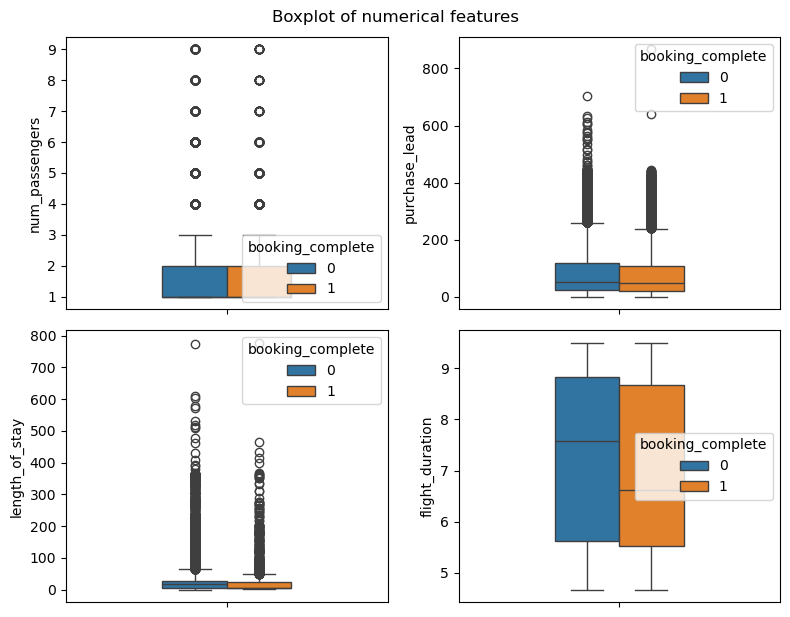

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    sns.boxplot(y=col, data=df, width=.4, hue='booking_complete', ax=axes[i], legend=True)
plt.tight_layout()
plt.suptitle("Boxplot of numerical features", y=1.02)
plt.show()

* `num_passengers`, `purchase_lead`, and `length_of_stay` are also significantly right skewed.
* For both labels in `flight_duration`, the distributions are similar. It is likely that it is not a useful predictor.
* Meanwhile `purhcase_lead` and `length_of_stay` both show apparently different distributions of the records from the labels. These features may be useful for modelling.
* Finally, since there are many outliers, log transformation is implemented.

In [9]:
df[['num_passengers_log', 'purchase_lead_log', 'length_of_stay_log']] = df[['num_passengers', 'purchase_lead', 'length_of_stay']].apply(lambda x: np.log(x+1))

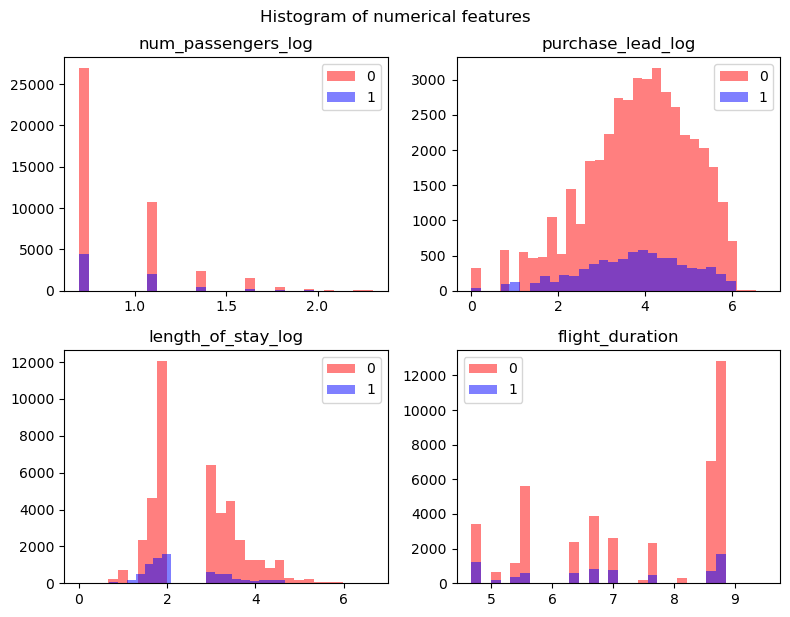

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(df[['num_passengers_log', 'purchase_lead_log', 'length_of_stay_log', 'flight_duration']].columns):
    axes[i].hist(df.loc[df['booking_complete'] == 0, col], bins=30, color='r', alpha=.5, label='0')
    axes[i].hist(df.loc[df['booking_complete'] == 1, col], bins=30, color='b', alpha=.5, label='1')
    axes[i].set_title(col)
    axes[i].legend()
plt.tight_layout()
plt.suptitle("Histogram of numerical features", y=1.02)
plt.show()

* At this stage, feature importance of these numerical features is not easily defined.

### <a id='categorical'>2.2 - Categorical Features</a>

In [11]:
df.select_dtypes(include=['object', 'int64']).head(2)

,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,Internet,RoundTrip,7,Sat,AKLDEL,New Zealand,1,0,0,0
1,Internet,RoundTrip,3,Sat,AKLDEL,New Zealand,0,0,0,0


#### `sales_channel`

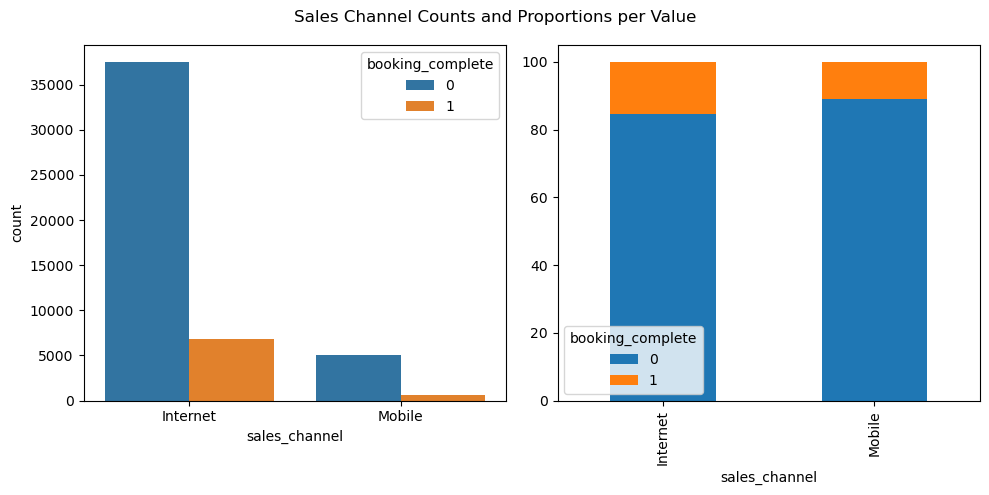

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

sns.countplot(data=df, x='sales_channel', hue='booking_complete', ax=axes[0])

(df.groupby('sales_channel')['booking_complete'].value_counts(normalize=True)*100).unstack().plot(kind='bar', stacked=True, ax=axes[1])

plt.suptitle("Sales Channel Counts and Proportions per Value")
plt.tight_layout()
plt.show()

* The proportions of `booking_complete` are slightly different for both `sales_channel`. It indicates that it may not be a strong feature for the model.

#### `trip_type`

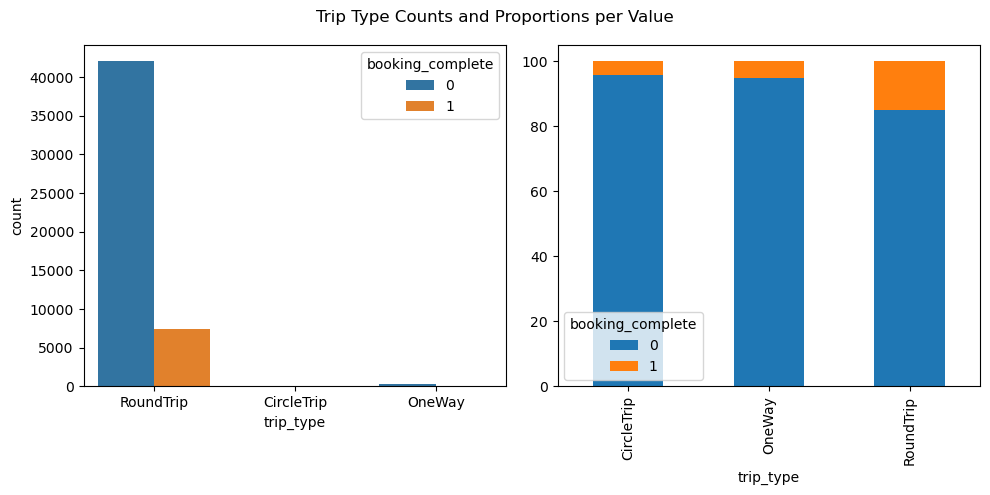

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

sns.countplot(data=df, x='trip_type', hue='booking_complete', ax=axes[0])

(df.groupby('trip_type')['booking_complete'].value_counts(normalize=True)*100).unstack().plot(kind='bar', stacked=True, ax=axes[1])

plt.suptitle("Trip Type Counts and Proportions per Value")
plt.tight_layout()
plt.show()

* `trip_type` as *RoundTrip* is slightly more likely to have the booking complete.

#### `flight_hour`

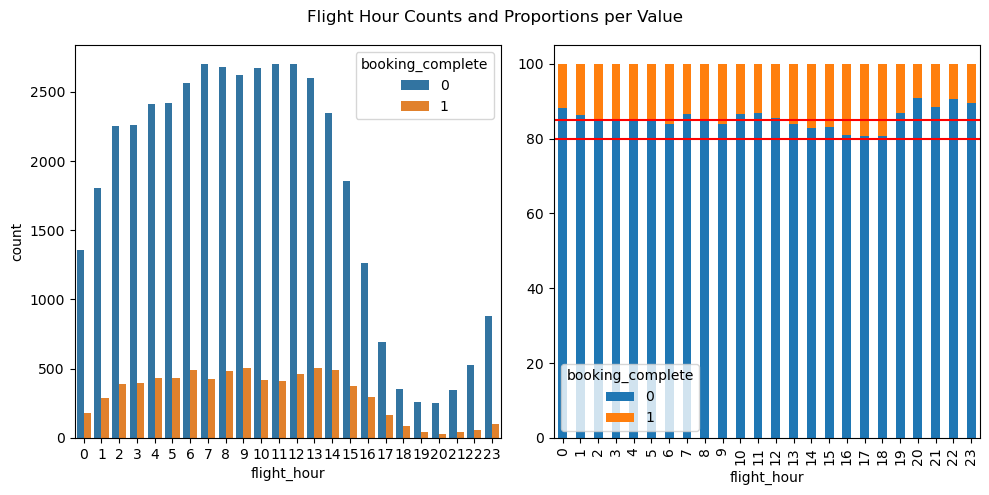

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

sns.countplot(data=df, x='flight_hour', hue='booking_complete', ax=axes[0])

(df.groupby('flight_hour')['booking_complete'].value_counts(normalize=True)*100).unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].axhline(y=80, color='r', linestyle='-')
axes[1].axhline(y=85, color='r', linestyle='-')

plt.suptitle("Flight Hour Counts and Proportions per Value")
plt.tight_layout()
plt.show()

* Although `flight_hour` is in **numeric** form, it should be treated as **categorical** otherwise the model would have wrong interpretation about the values, especially between $0$ and $23$.
* Interestingly, for `flight_hour` around **4PM-6PM**, the bookings are more likely to complete.

In [15]:
df['flight_hour'] = df['flight_hour'].astype('object')

#### `flight_day`

/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_1618/2879365400.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


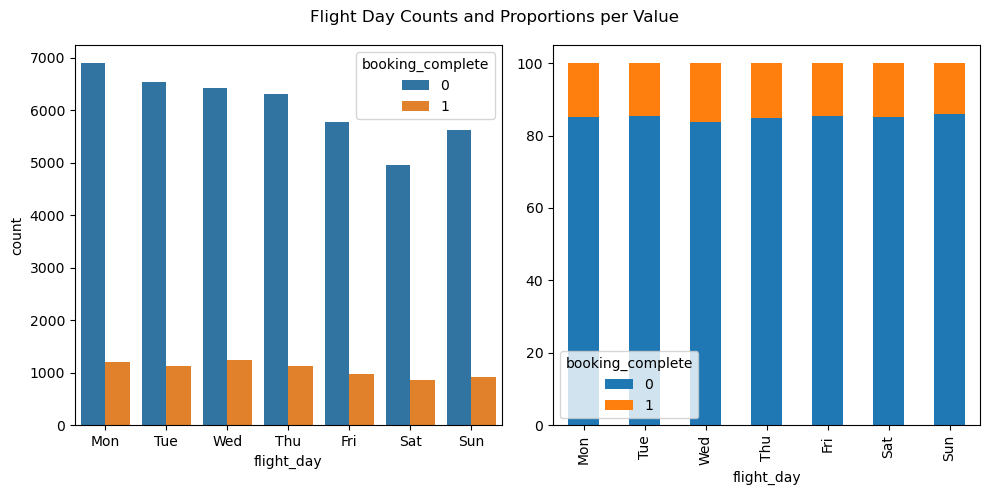

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

sns.countplot(data=df, x='flight_day', hue='booking_complete', ax=axes[0], order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[0].set_xticklabels(labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

(df.groupby('flight_day')['booking_complete'].value_counts(normalize=True)*100).unstack().loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].plot(kind='bar', stacked=True, ax=axes[1])

plt.suptitle("Flight Day Counts and Proportions per Value")
plt.tight_layout()
plt.show()

* $Wed$ is slightly more likely to have booking complete over other days.
* Apart from that, there is not much apparent difference among the days of week.

#### `route`

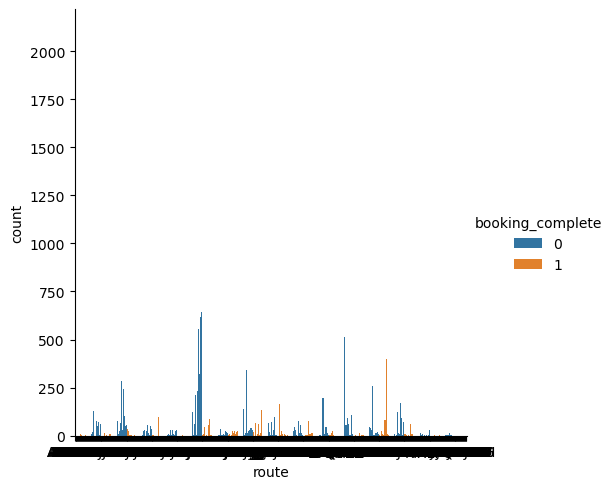

In [17]:
sns.catplot(data=df, x='route', hue='booking_complete', kind='count')
plt.show()

* `route` has too many unique data points with minimal values. Nevertheless, the above plot still indicates that some `route` has overwhelmingly higher `booking_complete` rate while some `route` have significantly low `booking_complete` rate.
* Note that the grouping done in the following will be applied to **training set** only during modelling.

In [18]:
def route_grouping(route):
    '''
    Group routes into 5 categories based on ratio of booking completion -
    1. 0-20% - Very Low
    2. 20-40% - Low
    3. 40-60% - Medium
    4. 60-80% - High
    5. 80-100% - Very High
    ----------
    Parameters:
        route (str) : Route labels (e.g. AKLDEL)
    ----------
    Returns:
        str : Group name
    '''
    
    total = df.loc[df['route'] == route, 'booking_complete'].count()
    complete = df.loc[df['route'] == route, 'booking_complete'].sum()
    ratio = complete / total

    if ratio < 0.2:
        return 'Very Low'
    elif ratio < 0.4:
        return 'Low'
    elif ratio < 0.6:
        return 'Medium'
    elif ratio < 0.8:
        return 'High'
    else:
        return 'Very High'

In [19]:
df['route_group'] = df['route'].apply(route_grouping)
df['route_group'] = df['route_group'].astype('object')
df['route_group'].value_counts()

route_group
Very Low     33233
Low          13647
Medium        3045
High            46
Very High       29
Name: count, dtype: int64

In [20]:
print(f"The routes that have VERY HIGH booking_complete rate:\n{df.loc[df['route_group'] == 'Very High', 'route'].unique()}")

The routes that have VERY HIGH booking_complete rate:
['AKLPEK' 'BKIKTM' 'CXRMEL' 'HDYOOL' 'JEDPEN' 'JOGKTM' 'KCHMRU' 'KOSSYD'
 'KTMURT' 'TGGXIY' 'CKGSGN' 'AORPUS' 'CKGKNO' 'MELNRT' 'AORPER']


#### `booking_origin`

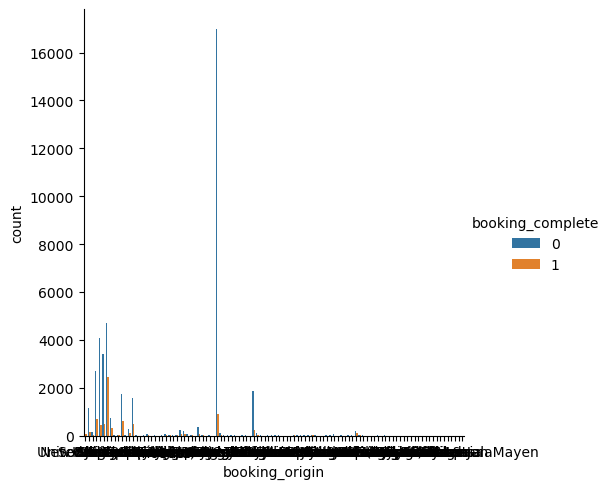

In [21]:
sns.catplot(data=df, x='booking_origin', hue='booking_complete', kind='count')
plt.show()

* Once again, due to the huge amount of unique values in `booking_origin` with many of them having trivial counts, similar approach is done by grouping.
* Note the grouping will be applied to **training set** only during modelling.

In [22]:
def booking_origin_grouping(origin):
    '''
    Group routes into 5 categories based on ratio of booking completion -
    1. 0-20% - Very Low
    2. 20-40% - Low
    3. 40-60% - Medium
    4. 60-80% - High
    5. 80-100% - Very High
    ----------
    Parameters:
        route (origin) : Origin labels (e.g. "New Zealand")
    ----------
    Returns:
        str : Group name
    '''
    
    total = df.loc[df['booking_origin'] == origin, 'booking_complete'].count()
    complete = df.loc[df['booking_origin'] == origin, 'booking_complete'].sum()
    ratio = complete / total

    if ratio < 0.2:
        return 'Very Low'
    elif ratio < 0.4:
        return 'Low'
    elif ratio < 0.6:
        return 'Medium'
    elif ratio < 0.8:
        return 'High'
    else:
        return 'Very High'

In [23]:
df['booking_origin_group'] = df['booking_origin'].apply(booking_origin_grouping)
df['booking_origin_group'] = df['booking_origin_group'].astype('object')
df['booking_origin_group'].value_counts()

booking_origin_group
Very Low     32140
Low          17825
Medium          23
High             8
Very High        4
Name: count, dtype: int64

In [24]:
print(f"The booking origins that have VERY HIGH booking_complete rate:\n{df.loc[df['booking_origin_group'] == 'Very High', 'booking_origin'].unique()}")

The booking origins that have VERY HIGH booking_complete rate:
['Seychelles' 'Vanuatu' 'Pakistan' 'Iraq']


#### `wants_extra_baggage`, `wants_preferred_seat`, `wants_in_flight_meals`

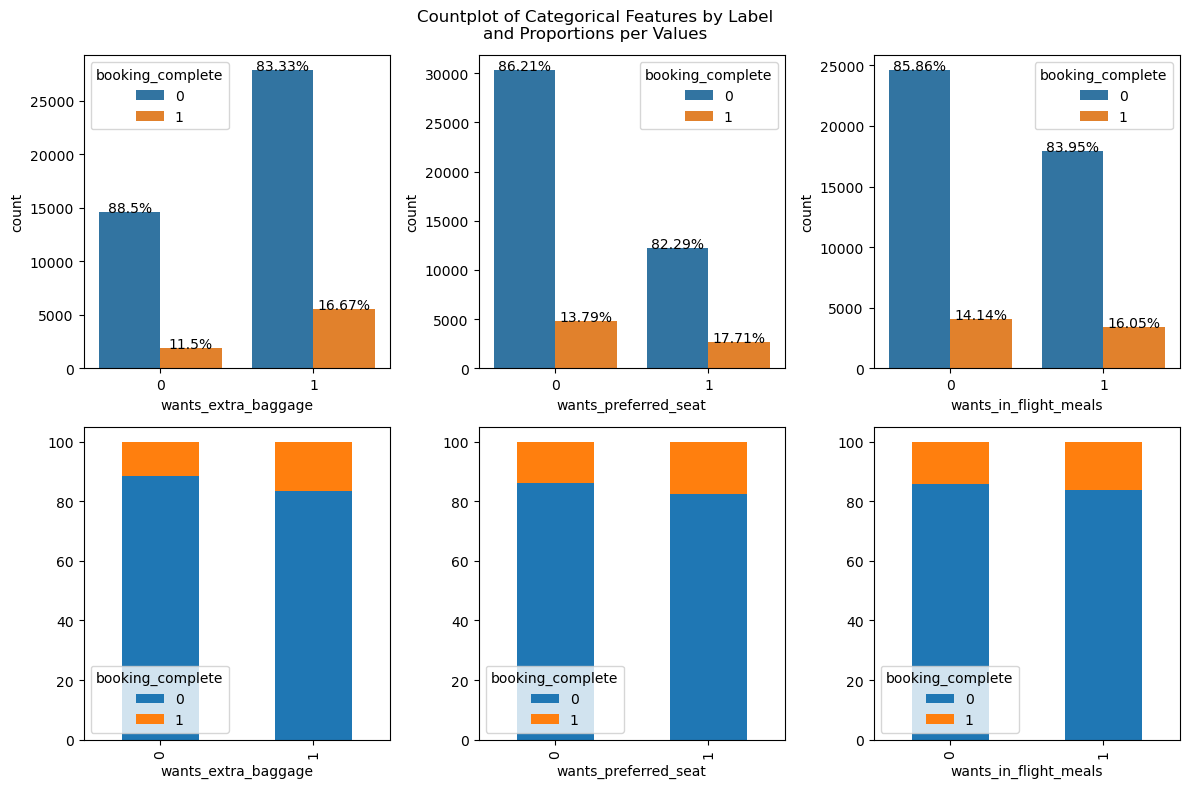

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

sns.countplot(data=df, x='wants_extra_baggage', hue='booking_complete', ax=axes[0])
axes[0].text(-.2, (df.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=False))[0,0], f"{(df.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=True)*100)[0,0].round(2)}%", color='black', ha='center')
axes[0].text(.2, (df.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=False))[0,1], f"{(df.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=True)*100)[0,1].round(2)}%", color='black', ha='center')
axes[0].text(.8, (df.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=False))[1,0], f"{(df.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=True)*100)[1,0].round(2)}%", color='black', ha='center')
axes[0].text(1.2, (df.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=False))[1,1], f"{(df.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=True)*100)[1,1].round(2)}%", color='black', ha='center')

(df.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=True)*100).unstack().plot(kind='bar', stacked=True, ax=axes[3])

sns.countplot(data=df, x='wants_preferred_seat', hue='booking_complete', ax=axes[1])
axes[1].text(-.2, (df.groupby('wants_preferred_seat')['booking_complete'].value_counts(normalize=False))[0,0], f"{(df.groupby('wants_preferred_seat')['booking_complete'].value_counts(normalize=True)*100)[0,0].round(2)}%", color='black', ha='center')
axes[1].text(.2, (df.groupby('wants_preferred_seat')['booking_complete'].value_counts(normalize=False))[0,1], f"{(df.groupby('wants_preferred_seat')['booking_complete'].value_counts(normalize=True)*100)[0,1].round(2)}%", color='black', ha='center')
axes[1].text(.8, (df.groupby('wants_preferred_seat')['booking_complete'].value_counts(normalize=False))[1,0], f"{(df.groupby('wants_preferred_seat')['booking_complete'].value_counts(normalize=True)*100)[1,0].round(2)}%", color='black', ha='center')
axes[1].text(1.2, (df.groupby('wants_preferred_seat')['booking_complete'].value_counts(normalize=False))[1,1], f"{(df.groupby('wants_preferred_seat')['booking_complete'].value_counts(normalize=True)*100)[1,1].round(2)}%", color='black', ha='center')

(df.groupby('wants_preferred_seat')['booking_complete'].value_counts(normalize=True)*100).unstack().plot(kind='bar', stacked=True, ax=axes[4])

sns.countplot(data=df, x='wants_in_flight_meals', hue='booking_complete', ax=axes[2])
axes[2].text(-.2, (df.groupby('wants_in_flight_meals')['booking_complete'].value_counts(normalize=False))[0,0], f"{(df.groupby('wants_in_flight_meals')['booking_complete'].value_counts(normalize=True)*100)[0,0].round(2)}%", color='black', ha='center')
axes[2].text(.2, (df.groupby('wants_in_flight_meals')['booking_complete'].value_counts(normalize=False))[0,1], f"{(df.groupby('wants_in_flight_meals')['booking_complete'].value_counts(normalize=True)*100)[0,1].round(2)}%", color='black', ha='center')
axes[2].text(.8, (df.groupby('wants_in_flight_meals')['booking_complete'].value_counts(normalize=False))[1,0], f"{(df.groupby('wants_in_flight_meals')['booking_complete'].value_counts(normalize=True)*100)[1,0].round(2)}%", color='black', ha='center')
axes[2].text(1.2, (df.groupby('wants_in_flight_meals')['booking_complete'].value_counts(normalize=False))[1,1], f"{(df.groupby('wants_in_flight_meals')['booking_complete'].value_counts(normalize=True)*100)[1,1].round(2)}%", color='black', ha='center')

(df.groupby('wants_in_flight_meals')['booking_complete'].value_counts(normalize=True)*100).unstack().plot(kind='bar', stacked=True, ax=axes[5])

plt.suptitle("Countplot of Categorical Features by Label\nand Proportions per Values")
plt.tight_layout()
plt.show()

* The shape of the bars does not show significant difference between labels.
* Nevertheless, among all three features, instances with `booking_complete` as $1$ are slightly more likely to complete the bookings.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  float64
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  float64
 4   length_of_stay         50000 non-null  float64
 5   flight_hour            50000 non-null  object 
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
 14  num_passengers_log     50000 non-null  float64
 15  pu

&emsp;The above exploratory data analysis showed some insights about the features and their relationship with the dependent variable `booking_complete`. Next, Decision Tree Classifier (, Random Forest Classifier, and XGBoost) will be built to understand the importance of features and their relative predicting power.
* The visualisations in the exploratory data analysis seemingly show that `purchase_lead`, `length_of_stay`, and `trip_type` may be good predictors.
* `flight_day` will not be used because the label proportions are about the same for each `day of week`.
* Other features will be included in the preminary model to examine the importance.

## <a id='preprocess'>3 - Data Preprocessing</a>

### Train Test Split

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop(columns=['booking_complete', 'num_passengers_log', 'purchase_lead_log', 'length_of_stay_log', 'route_group', 'booking_origin_group'])
y = df['booking_complete']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (30000, 13)
X_val shape: (10000, 13)
X_test shape: (10000, 13)


### `Manual Grouping` for `route` and `booking_origin`

In [ ]:
X_train['route_group'] = X_train['route'].apply(route_grouping)
X_train['route_group'] = X_train['route_group'].astype('object')
X_train['booking_origin_group'] = X_train['booking_origin'].apply(booking_origin_grouping)
X_train['booking_origin_group'] = X_train['booking_origin_group'].astype('object')

In [69]:
# Mapping for validation and test set
route_mapping = {
    'Very Low': X_train.loc[X_train['route_group'] == 'Very Low', 'route'].values.reshape(-1).tolist(),
    'Low': X_train.loc[X_train['route_group'] == 'Low', 'route'].values.reshape(-1).tolist(),
    'Medium': X_train.loc[X_train['route_group'] == 'Medium', 'route'].values.reshape(-1).tolist(),
    'High': X_train.loc[X_train['route_group'] == 'High', 'route'].values.reshape(-1).tolist(),
    'Very High': X_train.loc[X_train['route_group'] == 'Very High', 'route'].values.reshape(-1).tolist()
}

In [70]:
booking_origin_mapping = {
    'Very Low': X_train.loc[X_train['booking_origin_group'] == 'Very Low', 'booking_origin'].values.reshape(-1).tolist(),
    'Low': X_train.loc[X_train['booking_origin_group'] == 'Low', 'booking_origin'].values.reshape(-1).tolist(),
    'Medium': X_train.loc[X_train['booking_origin_group'] == 'Medium', 'booking_origin'].values.reshape(-1).tolist(),
    'High': X_train.loc[X_train['booking_origin_group'] == 'High', 'booking_origin'].values.reshape(-1).tolist(),
    'Very High': X_train.loc[X_train['booking_origin_group'] == 'Very High', 'booking_origin'].values.reshape(-1).tolist()
}

### `One Hot Encoding` Categorical Features

In [48]:
df.head(1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,num_passengers_log,purchase_lead_log,length_of_stay_log,route_group,booking_origin_group
0,2.0,Internet,RoundTrip,262.0,19.0,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1.098612,5.572154,2.995732,Very Low,Very Low


In [ ]:
categorical_features = ['sales_channel', 'trip_type', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

In [41]:
encoder = OneHotEncoder(sparse_output=False)

In [47]:
pd.DataFrame(encoder.fit_transform(X[['trip_type']])).value_counts()

0    1    2  
0.0  0.0  1.0    49497
     1.0  0.0      387
1.0  0.0  0.0      116
Name: count, dtype: int64